In [1]:
import os
import charts_function_list

In [2]:
base, data, outputs = charts_function_list.folder_setup()

#data = '/Users/alexanderpudlin/Documents/GitHub/charts_and_more_charts/data'
os.chdir(data)
bridges = pd.read_csv('bridges.csv').sort_values(by='Clearance/Height Above Ground').reset_index(drop=True)
#add some parantheses
bridges['City'] = bridges['City'].apply(lambda x: "("+str(x)+")")


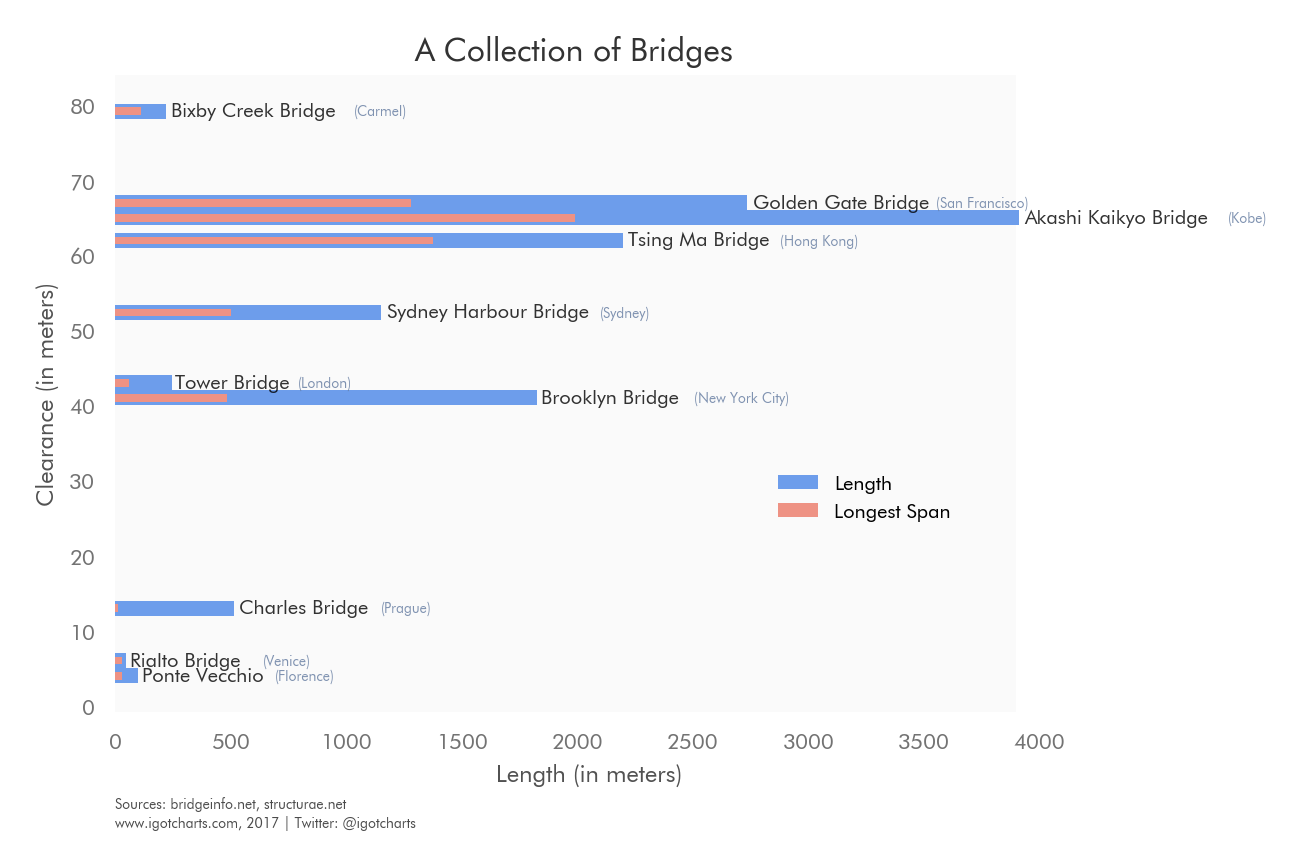

In [10]:
bridge_charts = charts_function_list.chart_maker('A Collection of Bridges',title_size=32)
fig = bridge_charts.initial_fig_axis(figsize=(17,11))
fig.subplots_adjust(top=.93)
ax = bridge_charts.axes_set_up(fig=fig)

ax.barh(bottom = bridges['Clearance/Height Above Ground'],width=bridges['Length'],color='#6D9DEB',height=2,
        label='Length')
ax.barh(bottom = bridges['Clearance/Height Above Ground'],width=bridges['Longest Span'],color='#EE9284',
        height=1,label='Longest Span')

ax.set_xlabel('Length (in meters)',size=24,color='#525252')
ax.set_ylabel('Clearance (in meters)',size=24,color='#525252')


bridge_charts.tick_params_(ax,fontsize=22,pad=20,labelcolor='#737373')
ax.legend(fontsize=20,bbox_to_anchor=(.9,.4))

#add labels
def label_makers(column,color='black',fontsize=20,scalar=1):
    for i,v in enumerate(bridges[column]):
        ax.text(bridges['Length'][i]+5+len(bridges['Bridge'][i])*scalar,bridges['Clearance/Height Above Ground'][i],v,va='center',ha='left',fontsize=fontsize,alpha=.8,color=color)

label_makers('Bridge')   
label_makers('City',fontsize=14,scalar=45,color='#60789E')
bridge_charts.patch_adder(ax,zorder=0,alpha=.3,width=.95)

bridge_charts.citations(ax,bridges.columns[-1],source_y=-.15,chart_tag_y=-.18,alpha=.7) 
ax.grid(alpha=0)
os.chdir(outputs)
charts_function_list.chart_save('Collection_of_Bridges')